# Recurrent networks

### Specify a simple network

In [1]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers.recurrent import SimpleRNN

input1 = Input(shape=(3,1))
x = SimpleRNN(2, activation='relu',return_sequences=False,name='rec')(input1)
predictions = Dense(1)(x)

model_1 = Model(input=input1, output=predictions)

model_1.compile('adam','mse')
model_1.summary()

Using Theano backend.
Using gpu device 0: Quadro K2100M (CNMeM is enabled with initial size: 80.0% of memory, cuDNN 5105)


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 3, 1)          0                                            
____________________________________________________________________________________________________
rec (SimpleRNN)                  (None, 2)             8           input_1[0][0]                    
____________________________________________________________________________________________________
dense_1 (Dense)                  (None, 1)             3           rec[0][0]                        
Total params: 11
____________________________________________________________________________________________________


### Generate some data

In [1]:
import numpy as np
#seq=np.arange(0,20,0.1)
seq=np.sin(np.arange(0,20,0.1))


time_step=3
x_in=[]
for i in range(len(seq)-time_step+1):
    x_in.append(seq[i:i+time_step])

x_in=np.array(x_in)
x_in=x_in.reshape(-1,time_step,1)

print seq[:10]
x_in[:3]

[ 0.          0.09983342  0.19866933  0.29552021  0.38941834  0.47942554
  0.56464247  0.64421769  0.71735609  0.78332691]


array([[[ 0.        ],
        [ 0.09983342],
        [ 0.19866933]],

       [[ 0.09983342],
        [ 0.19866933],
        [ 0.29552021]],

       [[ 0.19866933],
        [ 0.29552021],
        [ 0.38941834]]])

### Take the (untrained) model and play with the weights to see the effect on y

In [3]:
# check the weights:
model_1.get_layer("rec").get_weights()

[array([[ 1.08284771, -1.01713109]], dtype=float32),
 array([[-0.65036941,  0.88714129],
        [ 0.88714129,  0.65036941]], dtype=float32),
 array([ 0.,  0.], dtype=float32)]

In [4]:
# set the weights:
model_1.get_layer("rec").set_weights(
[np.array([[.1, .1]]),
 np.array([[-1, -1],
           [1, 0]]),
 np.array( [-2,2])])

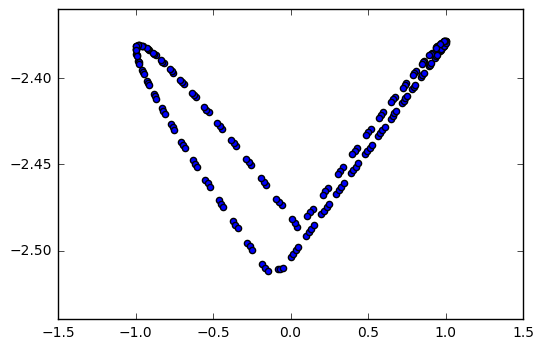

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

pred=model_1.predict(x_in)
plt.scatter(seq[:len(pred)],pred)

In [92]:
def data_gen(digits=8):
    vfunc = np.vectorize(np.binary_repr)
    x = (vfunc(range(2**digits),width=digits).repeat(1))
    x = np.array([list(x[i]) for i in range(x.shape[0])]).astype(int).reshape(-1,digits,1)*2-1
    y= ((np.sum(np.abs(np.diff(x[:,:,0])),axis=1))==2*(digits-1)).astype(int)
    return x,y

train_x,train_y=data_gen(4)

print ("example data:")
print (train_x)
print (train_y)

print (train_x.shape)

train_x,train_y=data_gen()

example data:
[[[-1]
  [-1]
  [-1]
  [-1]]

 [[-1]
  [-1]
  [-1]
  [ 1]]

 [[-1]
  [-1]
  [ 1]
  [-1]]

 [[-1]
  [-1]
  [ 1]
  [ 1]]

 [[-1]
  [ 1]
  [-1]
  [-1]]

 [[-1]
  [ 1]
  [-1]
  [ 1]]

 [[-1]
  [ 1]
  [ 1]
  [-1]]

 [[-1]
  [ 1]
  [ 1]
  [ 1]]

 [[ 1]
  [-1]
  [-1]
  [-1]]

 [[ 1]
  [-1]
  [-1]
  [ 1]]

 [[ 1]
  [-1]
  [ 1]
  [-1]]

 [[ 1]
  [-1]
  [ 1]
  [ 1]]

 [[ 1]
  [ 1]
  [-1]
  [-1]]

 [[ 1]
  [ 1]
  [-1]
  [ 1]]

 [[ 1]
  [ 1]
  [ 1]
  [-1]]

 [[ 1]
  [ 1]
  [ 1]
  [ 1]]]
[0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0]
(16L, 4L, 1L)


In [128]:
#Boosting option:
train_x,train_y=data_gen(10)
boost=100

train_x=np.concatenate((train_x,np.repeat(train_x[train_y==1,:,:],boost,axis=0)),axis=0) 
train_y=np.concatenate((train_y,np.ones(boost*2)),axis=0) 
print train_x.shape 
print train_y.shape 

# check for sorting effects while fitting
#def unison_shuffled_copies(a, b):
#    assert len(a) == len(b)
#    p = np.random.permutation(len(a))
#    return a[p], b[p]
#
#train_x_p,train_y_p=unison_shuffled_copies(train_x,train_y)

(1224L, 10L, 1L)
(1224L,)


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_24 (InputLayer)            (None, 10, 1)         0                                            
____________________________________________________________________________________________________
rec (SimpleRNN)                  (None, 2)             8           input_24[0][0]                   
____________________________________________________________________________________________________
dense_19 (Dense)                 (None, 1)             3           rec[0][0]                        
Total params: 11
____________________________________________________________________________________________________
('loss:', 0.041254803538322449, 'accuray:', 0.99754901960784315)


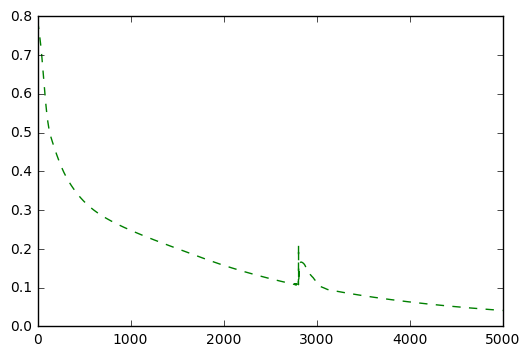

In [129]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers.recurrent import SimpleRNN

input1 = Input(shape=(10,1))    
x = SimpleRNN(2, activation='tanh',return_sequences=False, name='rec')(input1)   
predictions = Dense(1,activation='sigmoid')(x)

model_1 = Model(input=input1, output=predictions)

model_1.compile(loss='binary_crossentropy', optimizer ='adam', metrics=['acc'])
model_1.summary()

model_1.fit(train_x,train_y,batch_size=len(train_x), nb_epoch=5000, verbose=0)

plt.plot(model_1.history.epoch, model_1.history.history['loss'], 'g--')

print ("loss:",model_1.history.history['loss'][-1],"accuray:",model_1.history.history['acc'][-1])

[ 0.01  0.02  0.03  0.06  0.14  0.16  0.29  0.65  0.76  0.82  0.89]


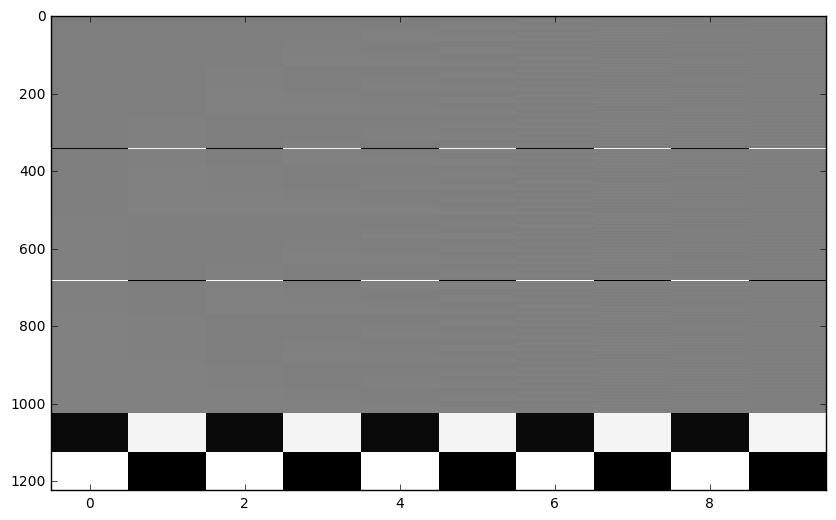

In [130]:
import pandas as pd
print np.sort(pd.DataFrame(model_1.predict(train_x))[0].round(2).unique().round(2))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

ax.imshow(model_1.predict(train_x)*train_x[:,:,0],interpolation='none',cmap='gray')

ax.set_aspect(0.005)


plt.show()

In [131]:
# check the weights:
model_1.get_layer("rec").get_weights()

[array([[-0.49427336, -0.37325993]], dtype=float32),
 array([[ 0.32927161, -2.46121979],
        [-1.95909166,  0.48384178]], dtype=float32),
 array([-0.37062907,  0.20366815], dtype=float32)]

### MPL approach

In [134]:
train_x_flat=train_x.reshape(-1,train_x.shape[1])

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_30 (InputLayer)            (None, 10)            0                                            
____________________________________________________________________________________________________
den (Dense)                      (None, 2)             22          input_30[0][0]                   
____________________________________________________________________________________________________
dense_30 (Dense)                 (None, 1)             3           den[0][0]                        
Total params: 25
____________________________________________________________________________________________________
('loss:', 1.0615462454164599e-07, 'accuray:', 1.0)


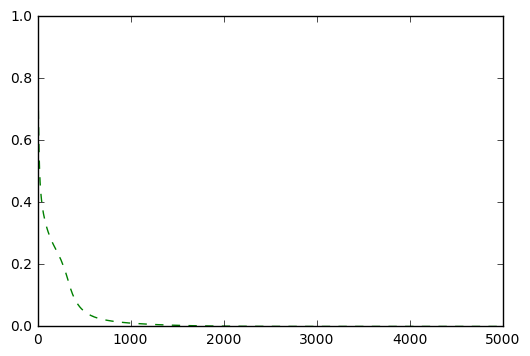

In [146]:
from keras.models import Model
from keras.layers import Input, Dense

input1 = Input(shape=(10,))
x = Dense(2, activation='relu',name='den')(input1)
predictions = Dense(1,activation='sigmoid')(x)

model_2 = Model(input=input1, output=predictions)

model_2.compile(loss='binary_crossentropy', optimizer ='adam', metrics=['acc'])
model_2.summary()

model_2.fit(train_x_flat,train_y,batch_size=100, nb_epoch=5000, verbose=0)

plt.plot(model_2.history.epoch, model_2.history.history['loss'], 'g--')

print ("loss:",model_2.history.history['loss'][-1],"accuray:",model_2.history.history['acc'][-1])

[ 0.  1.]


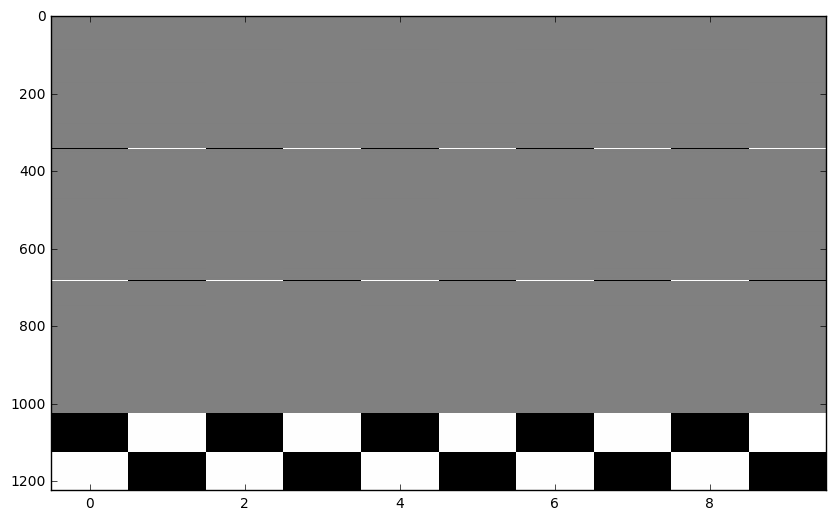

In [147]:
import pandas as pd
print np.sort(pd.DataFrame(model_2.predict(train_x_flat))[0].round(2).unique().round(2))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

ax.imshow(model_2.predict(train_x_flat)*train_x[:,:,0],interpolation='none',cmap='gray')

ax.set_aspect(0.005)

plt.show()

[array([[ 0.79976588,  4.0738554 ],
        [-0.79780263, -4.07010746],
        [ 0.79803503,  4.07192469],
        [-0.797575  , -4.07218218],
        [ 0.79808235,  4.07176399],
        [-0.79747772, -4.07274199],
        [ 0.79882014,  4.07075119],
        [-0.79757845, -4.06990051],
        [ 0.80310714,  4.06969547],
        [-0.79715377, -4.06984043]], dtype=float32),
 array([ 7.98119593, -3.55298734], dtype=float32)]

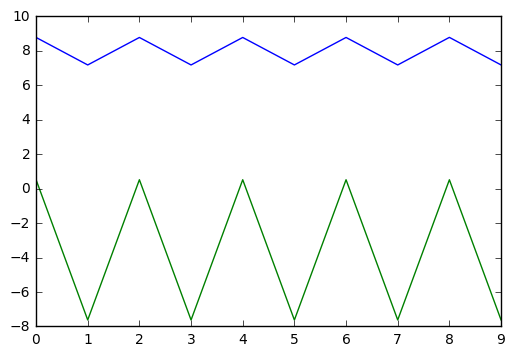

In [152]:
# check the weights:
plt.plot(model_2.get_layer("den").get_weights()[0]+model_2.get_layer("den").get_weights()[1])
model_2.get_layer("den").get_weights()

# Which number is larger?

In [143]:
def num2dum(number,digits):
    dummy=np.zeros((digits,10))
    number=(str('0')*digits+str(number))[-digits:]
    for i,j in enumerate(str(number)[::-1]):
        dummy[i,int(j)]=1
    return dummy

def dum2num(dummy):
    number=0
    for i in range(dummy.shape[0]):
        number+=np.argmax(dummy[i]) *10**i
        i+=1
    return number

dummy=num2dum(12345,5)
print dummy
number=dum2num(dummy)
print number

[[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]]
12345


In [144]:
import pandas as pd
training_size=5000 
max_number=999
data = pd.DataFrame(np.random.randint(max_number, size=(training_size, 2)), columns=list('AB'))
# data = pd.DataFrame(np.random.randint(int(max_number/2), size=(training_size, 2)), columns=list('AB')) # test covariance shift
# change the data generating mechanism. E.g. only even numbers.

data['target']=0
data=data[(data['A']!=data['B'])]
data.ix[(data['A']>data['B']),'target']=1
data.ix[(data['A']<data['B']),'target']=0

print(data.groupby('target').count())

data=data.groupby(['A','B','target']).count().reset_index()

train_x=[]
test_x=[]

for i in range(len(data)):
    if i%2==0: # provide less data to training
        train_x.append([num2dum(data.ix[i,'A'],len(str(max_number))),num2dum(data.ix[i,'B'],len(str(max_number)))])
    else:
        test_x.append([num2dum(data.ix[i,'A'],len(str(max_number))),num2dum(data.ix[i,'B'],len(str(max_number)))])

train_x=np.swapaxes(np.array(train_x),2,1).reshape(-1,len(str(max_number)),20)
test_x=np.swapaxes(np.array(test_x),2,1).reshape(-1,len(str(max_number)),20)

train_y=data.ix[(data.index %2 ==0),'target'].values
test_y=data.ix[(data.index %2 ==1),'target'].values

print train_x[0]
ff=train_x[0]
data.head(1)

           A     B
target            
0       2468  2468
1       2529  2529
[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.
   0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.
   0.  0.]]


,A,B,target
0,0,7,0


____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_15 (InputLayer)            (None, 3, 20)         0                                            
____________________________________________________________________________________________________
rec (SimpleRNN)                  (None, 2)             46          input_15[0][0]                   
____________________________________________________________________________________________________
dense_19 (Dense)                 (None, 1)             3           rec[0][0]                        
Total params: 49
____________________________________________________________________________________________________
('loss:', 0.0074413381793046705, 'accuray:', 1.0)
('test loss:', 0.0093192363421668485, 'test accuray:', 0.99879807692307687)


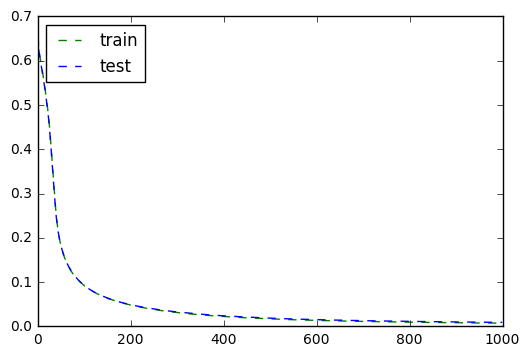

In [149]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers.recurrent import SimpleRNN

input1 = Input(shape=(3,20))    # try out: inverse the time order
x = SimpleRNN(2, activation='relu',return_sequences=False, name='rec')(input1)   
predictions = Dense(1,activation='sigmoid')(x)

model_3 = Model(input=input1, output=predictions)

model_3.compile(loss='binary_crossentropy', optimizer ='adam', metrics=['acc'])
model_3.summary()

model_3.fit(train_x,train_y,batch_size=100, nb_epoch=1000, verbose=0,validation_data=(test_x, test_y))

plt.plot(model_3.history.epoch, model_3.history.history['loss'], 'g--',
         model_3.history.epoch, model_3.history.history['val_loss'], 'b--',)
plt.legend(['train', 'test'], loc='upper left')

print ("loss:",model_3.history.history['loss'][-1],"accuray:",model_3.history.history['acc'][-1])
print ("test loss:",model_3.history.history['val_loss'][-1],"test accuray:",model_3.history.history['val_acc'][-1])

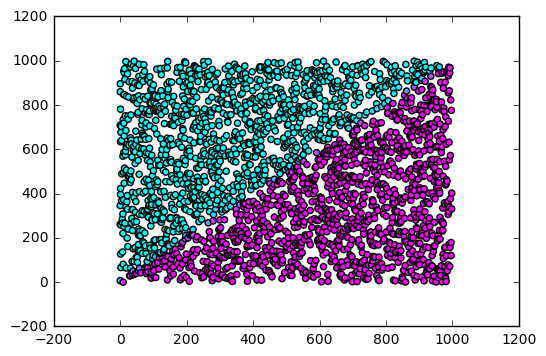

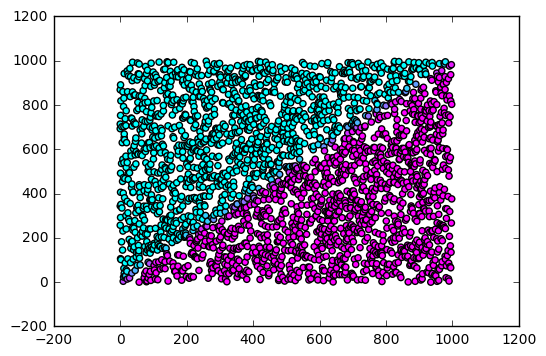

In [146]:
plt.figure(1)
pred1=model_3.predict(train_x)
plt.scatter(data.ix[(data.index %2 ==0),['A']],data.ix[(data.index %2 ==0),['B']],c=pred1,cmap='cool')
plt.figure(2)
pred2=model_3.predict(test_x)
plt.scatter(data.ix[(data.index %2 ==1),['A']],data.ix[(data.index %2 ==1),['B']],c=pred2,cmap='cool')

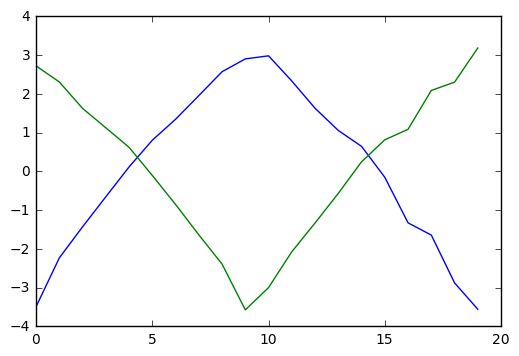

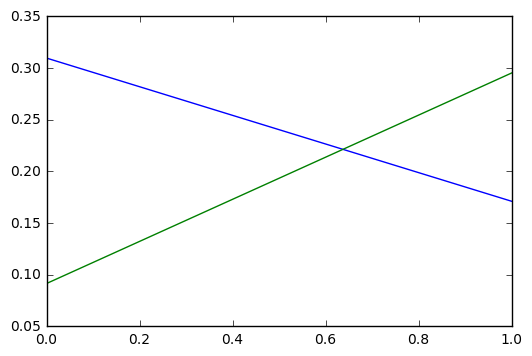

In [166]:
# check the weights:
weights = model_3.get_layer("rec").get_weights()
plt.plot(weights[0])
plt.show()
plt.plot(weights[1])

# Putting the same in an MLP

In [115]:
train_x_flat=train_x.reshape(-1,3*20)
test_x_flat=test_x.reshape(-1,3*20)

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_13 (InputLayer)            (None, 60)            0                                            
____________________________________________________________________________________________________
dense_16 (Dense)                 (None, 2)             122         input_13[0][0]                   
____________________________________________________________________________________________________
dense_17 (Dense)                 (None, 1)             3           dense_16[0][0]                   
Total params: 125
____________________________________________________________________________________________________
('loss:', 0.004510181767052231, 'accuray:', 1.0)
('test loss:', 0.023989787776132497, 'test accuray:', 0.99075190993164453)


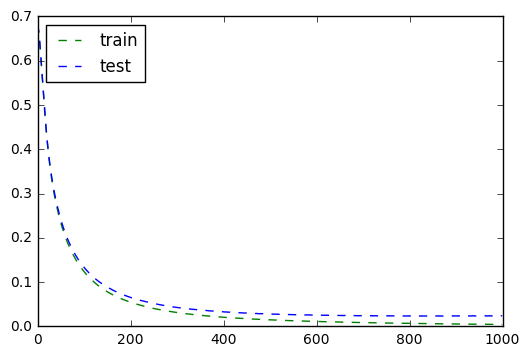

In [116]:
from keras.models import Model
from keras.layers import Input, Dense

input1 = Input(shape=(60,))
x = Dense(2, activation='relu')(input1)
predictions = Dense(1,activation='sigmoid')(x)

model_4 = Model(input=input1, output=predictions)

model_4.compile(loss='binary_crossentropy', optimizer ='adam', metrics=['acc'])
model_4.summary()

model_4.fit(train_x_flat,train_y,batch_size=100, nb_epoch=1000, verbose=0,validation_data=(test_x_flat, test_y))

plt.plot(model_4.history.epoch, model_4.history.history['loss'], 'g--',
         model_4.history.epoch, model_4.history.history['val_loss'], 'b--',)
plt.legend(['train', 'test'], loc='upper left')

print ("loss:",model_4.history.history['loss'][-1],"accuray:",model_4.history.history['acc'][-1])
print ("test loss:",model_4.history.history['val_loss'][-1],"test accuray:",model_4.history.history['val_acc'][-1])

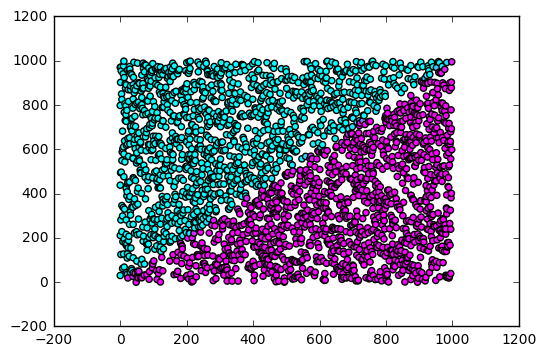

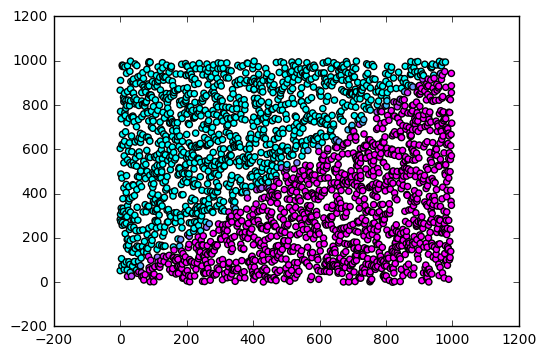

In [117]:
plt.figure(1)
pred1=model_4.predict(train_x_flat)
plt.scatter(data.ix[(data.index %2 ==0),['A']],data.ix[(data.index %2 ==0),['B']],c=pred1,cmap='cool')
plt.figure(2)
pred2=model_4.predict(test_x_flat)
plt.scatter(data.ix[(data.index %2 ==1),['A']],data.ix[(data.index %2 ==1),['B']],c=pred2,cmap='cool')

In [139]:
check=pd.DataFrame(model_4.predict(test_x_flat),columns=['pred'])
check['target']=test_y
check[['A','B']]=(data.ix[(data.index % 2 ==1),['A','B']]).reset_index(drop=True)
check.ix[(check['target']==0) &(check['pred']>0.8)]

,pred,target,A,B
58,0.901820,0,22,26
214,0.946101,0,85,116
234,0.957204,0,92,99
1031,0.818729,0,411,417
1249,0.996277,0,495,496


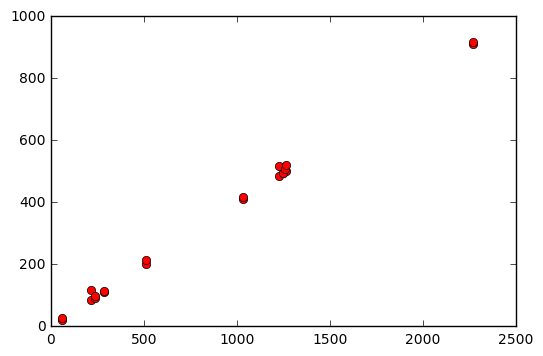

In [141]:
plt.plot(check.ix[(check['target']==0) &(check['pred']>0.5),['A','B']],'ro')